In [1]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 141kB/s 
     |████████████████████████████████| 20.2MB 74.0MB/s 
ERROR: imgaug 0.2.9 requires opencv-python, which is not installed.
ERROR: dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
ERROR: albumentations 0.1.12 requires opencv-python, which is not installed.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.4
    Uninstalling numpy-1.18.4:
      Successfully uninstalled numpy-1.18.4
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [0]:
# import basic functions
import numpy as np 
import cv2
import glob
import os 
import matplotlib.pyplot as plt

In [191]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [192]:
!ls 'drive/My Drive/CVIT Day 4/Feature Matching/'

62.png	box_in_scene.png  box.png


In [0]:
image1=cv2.imread('drive/My Drive/CVIT Day 4/Feature Matching/box.png',cv2.IMREAD_GRAYSCALE)
image2=cv2.imread('drive/My Drive/CVIT Day 4/Feature Matching/box_in_scene.png',cv2.IMREAD_GRAYSCALE)

In [0]:
# Initiate Sift detector
sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1,None)
kp2, des2 = sift.detectAndCompute(image2,None)

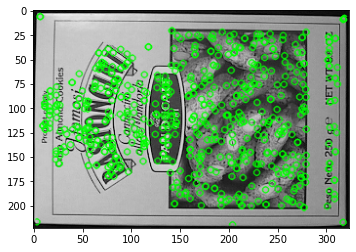

In [195]:
plt.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))

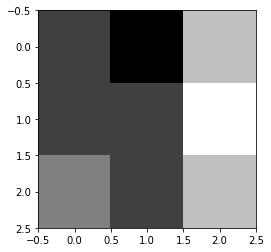

In [196]:
plt.imshow(image1[14:17,14:17],cmap='gray')

In [197]:
np.reshape(image1[14:17,14:17],(1,-1))

array([[196, 195, 198, 196, 196, 199, 197, 196, 198]], dtype=uint8)

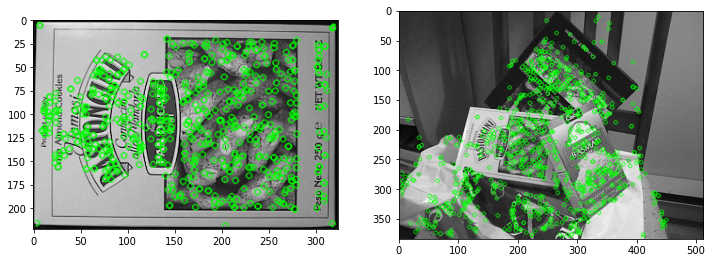

In [198]:
fig, axes = plt.subplots(1,2,figsize = [12,12])
axes[0].imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))
axes[1].imshow(cv2.drawKeypoints(image2,kp2,None,color=(0,255,0)))

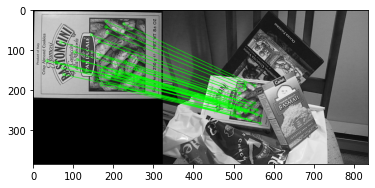

In [199]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)

threshold = 0.5
good = []
for m,n in matches:
    if m.distance < threshold*n.distance:
        """
        0.5 is threshold.
        Decrease it to be more accurate, but lose some matches
        Increase it to be less accurate, but get more matches
        """
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(image1,kp1,image2,kp2,good,None,**draw_params)
plt.imshow(img3)

In [0]:
image1=cv2.imread('drive/My Drive/CVIT Day 4/Panorama/Eg1/img2_2.png')
image2=cv2.imread('drive/My Drive/CVIT Day 4/Panorama/Eg1/img2_1.png')

image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

In [0]:
# find the keypoints and descriptors with ORB
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(image1_gray,None)
kp2, des2 = orb.detectAndCompute(image2_gray,None)

In [0]:
# Initiate Sift detector
sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1_gray,None)
kp2, des2 = sift.detectAndCompute(image2_gray,None)

Text(0.5, 0, '(b)')

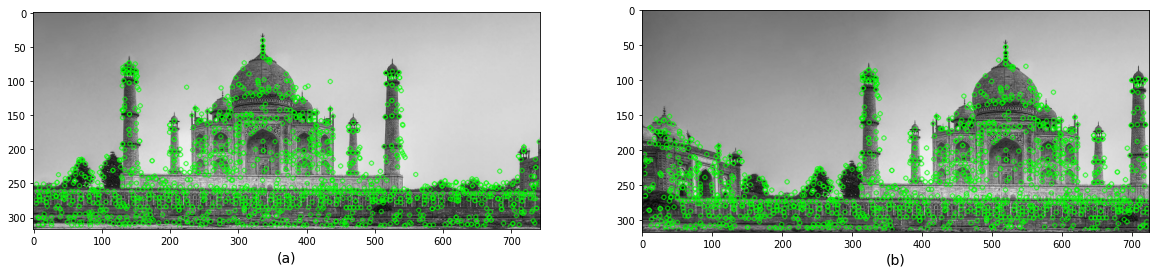

In [203]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1_gray,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(image2_gray,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

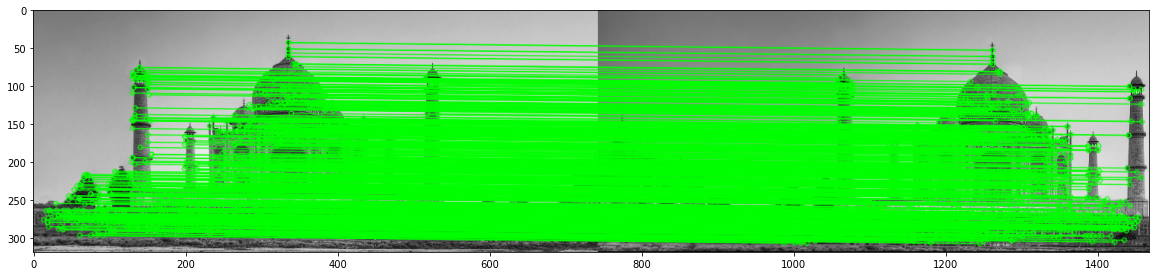

In [204]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.001*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(image1_gray,kp1,image2_gray,kp2,good,None,**draw_params)
plt.figure(figsize=[20,20])
plt.imshow(img3)

In [205]:
len(good)

919

In [0]:
MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    h,w = image2_gray.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts, M)
    #img2 = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

    #plt.imshow(img2)
else:
    print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

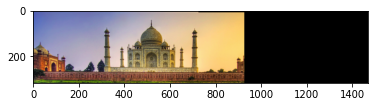

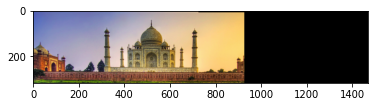

In [207]:
dst = cv2.warpPerspective(image1,M,(image2.shape[1] + image1.shape[1], image2.shape[0]))
dst2 = np.copy(dst)
dst[0:image2.shape[0],0:image2.shape[1]] = image2
plt.imshow(dst)
plt.figure()
dst3 = np.copy(dst2)
src_ = cv2.warpPerspective(image2,np.eye(3),(image2.shape[1] + image1.shape[1], image2.shape[0]))
dst3[np.where((dst3[:,:,0]==0)&(dst3[:,:,1]==0)&(dst3[:,:,2]==0))] = src_[np.where((dst3[:,:,0]==0)&(dst3[:,:,1]==0)&(dst3[:,:,2]==0))] 
plt.imshow(dst3)

In [0]:
image1=cv2.imread('drive/My Drive/CVIT Day 4/Panorama/Eg3/img4_1.jpg')
image2=cv2.imread('drive/My Drive/CVIT Day 4/Panorama/Eg3/img4_2.jpg')

image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

In [0]:
# find the keypoints and descriptors with ORB
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(image1_gray,None)
kp2, des2 = orb.detectAndCompute(image2_gray,None)

In [0]:
# Initiate Sift detector
sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1_gray,None)
kp2, des2 = sift.detectAndCompute(image2_gray,None)

Text(0.5, 0, '(b)')

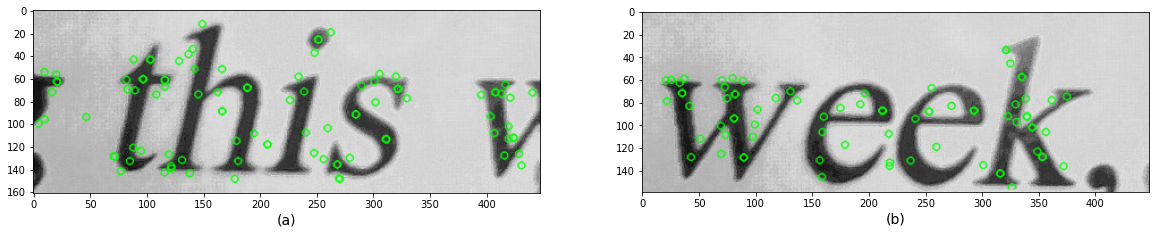

In [211]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1_gray,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(image2_gray,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

10


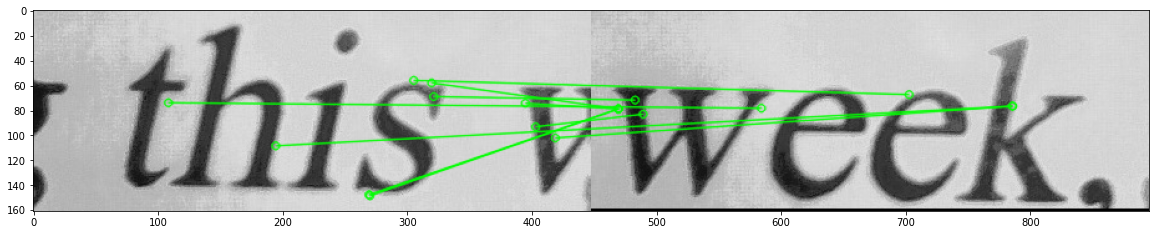

In [212]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.65*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(image1_gray,kp1,image2_gray,kp2,good,None,**draw_params)
plt.figure(figsize=[20,20])
plt.imshow(img3)
print(len(good))

In [0]:
def trim(frame):
          #crop top
          if not np.sum(frame[0]):
              return trim(frame[1:])
          #crop bottom
          if not np.sum(frame[-1]):
              return trim(frame[:-2])
          #crop left
          if not np.sum(frame[:,0]):
              return trim(frame[:,1:])
          #crop right
          if not np.sum(frame[:,-1]):
              return trim(frame[:,:-2])
          return frame

def panorama(path_right,path_left,threshold=0.5,min_match=10):

    #   image1=cv2.imread(path_right)
    #   image2=cv2.imread(path_left)
      image1 = path_right
      image2 = path_left
      image1_gray=cv2.cvtColor(image1,cv2.COLOR_RGB2GRAY)
      image2_gray=cv2.cvtColor(image2,cv2.COLOR_RGB2GRAY)

      # Initiate Sift detector
      sift =cv2.xfeatures2d.SIFT_create()
      kp1, des1 = sift.detectAndCompute(image1_gray,None)
      kp2, des2 = sift.detectAndCompute(image2_gray,None)

      # display the keypoints and features detected on both images
      #fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
      #ax1.imshow(cv2.drawKeypoints(image1_gray,kp1,None,color=(0,255,0)))
      #ax1.set_xlabel("(a)", fontsize=14)
      #ax2.imshow(cv2.drawKeypoints(image2_gray,kp2,None,color=(0,255,0)))
      #ax2.set_xlabel("(b)", fontsize=14)

      match = cv2.BFMatcher()
      matches = match.knnMatch(des1,des2,k=2)

      good = []
      for m,n in matches:
          if m.distance < threshold*n.distance:
              good.append(m)

      draw_params = dict(matchColor=(0,255,0),
                            singlePointColor=None,
                            flags=2)

      img3 = cv2.drawMatches(image1_gray,kp1,image2_gray,kp2,good,None,**draw_params)
      #plt.imshow(img3)
      print('Matches: {}'.format(len(good)))
      MIN_MATCH_COUNT = min_match
      if len(good) > MIN_MATCH_COUNT:
          src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
          dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

          M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

          h,w = image2_gray.shape
          pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
          dst = cv2.perspectiveTransform(pts, M)
          #img2 = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

          #plt.imshow(img2)
      else:
          print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

      dst = cv2.warpPerspective(image1,M,(image2.shape[1] + image1.shape[1], image2.shape[0]+ image1.shape[0]))
      #dst[0:image2.shape[0],0:image2.shape[1]] = image2
      src_ = cv2.warpPerspective(image2,np.eye(3),(image2.shape[1] + image1.shape[1], image2.shape[0]+image1.shape[0]))
      dst[np.where((dst[:,:,0]==0)&(dst[:,:,1]==0)&(dst[:,:,2]==0))] = src_[np.where((dst[:,:,0]==0)&(dst[:,:,1]==0)&(dst[:,:,2]==0))] 
      plt.imshow(dst)
      #plt.imshow(dst)

      
      #plt.imshow(trim(dst))
      #cv2.imsave("original_image_stitched_crop.jpg", trim(dst))
      return(trim(dst))

Matches: 6


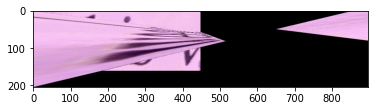

In [214]:
plt.imshow(panorama(image2,image1,threshold=0.75,min_match=0))

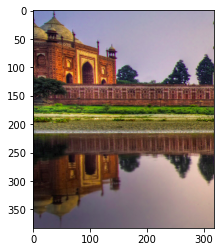

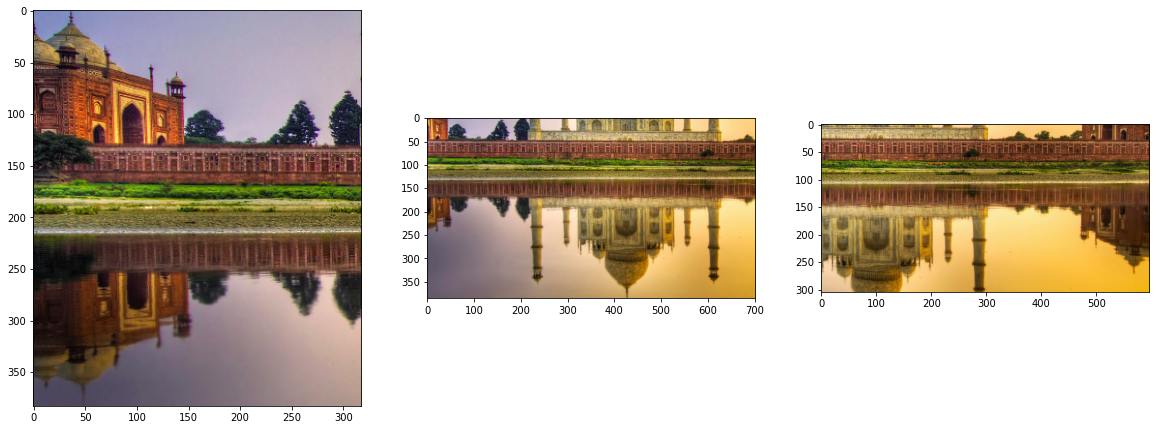

In [215]:
I1=cv2.imread('drive/My Drive/CVIT Day 4/Panorama/Eg2/img2_4.png')
I2=cv2.imread('drive/My Drive/CVIT Day 4/Panorama/Eg2/img2_5.png')
I3=cv2.imread('drive/My Drive/CVIT Day 4/Panorama/Eg2/img2_6.png')
I1 = cv2.cvtColor(I1,cv2.COLOR_BGR2RGB)
I2 = cv2.cvtColor(I2,cv2.COLOR_BGR2RGB)
I3 = cv2.cvtColor(I3,cv2.COLOR_BGR2RGB)
plt.imshow(I1)
fig,axes = plt.subplots(1,3,figsize = [20,20])
axes[0].imshow(I1)
axes[1].imshow(I2)
axes[2].imshow(I3)
fig.show()

In [216]:
I1.shape

(383, 318, 3)

Matches: 529
Matches: 905


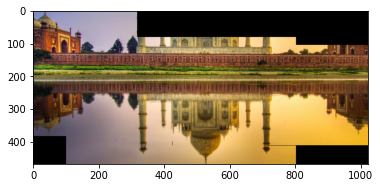

In [217]:
plt.imshow(panorama(I3,panorama(I2,I1,threshold=0.5,min_match=100),threshold=0.5,min_match=100))

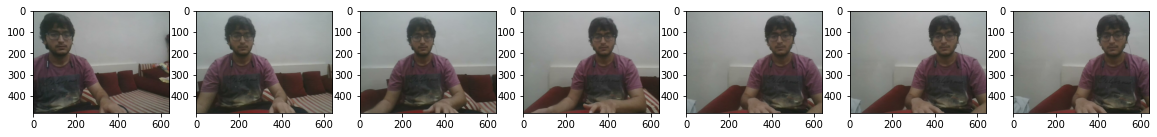

In [224]:
Is = list()
for x in range(1,8):
    Is.append(cv2.cvtColor(cv2.imread('drive/My Drive/CVIT Day 4/assignment_folder/img{}.jpg'.format(x)),cv2.COLOR_BGR2RGB))
fig, axes = plt.subplots(1,len(Is),figsize = [20,20])
for i in range(len(Is)):
    axes[i].imshow(Is[i])
fig.show()

Matches: 324
Matches: 49
Matches: 34
Matches: 32
Matches: 28
Matches: 34
Matches: 40


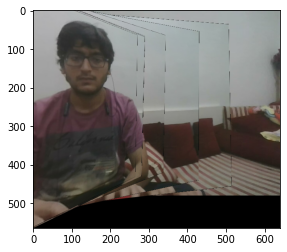

In [226]:
cumu = Is[0]
for x in range(len(Is)):
    cumu = panorama(Is[x],cumu,threshold = 0.7,min_match=0)
plt.imshow(cumu)